<a href="https://colab.research.google.com/github/allenbiji/demo/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

sns.set()



from google.colab import files

# Upload file
uploaded = files.upload()

# Check the uploaded files
for file_name in uploaded.keys():
    print(f'User uploaded file "{file_name}" with length {len(uploaded[file_name])} bytes')


Saving 1.04.+Real-life+example.csv to 1.04.+Real-life+example (2).csv
User uploaded file "1.04.+Real-life+example (2).csv" with length 225102 bytes


In [96]:
df=pd.read_csv('1.04.+Real-life+example.csv')

In [97]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [98]:
df.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Data PreProcessing

In [99]:
data=df.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [100]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [101]:
 data.dropna(axis=0)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [102]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Here, the mean seems to be pushed by an outlier max. data , it has to be dealt with, through the quantile method

In [103]:
q=data['Price'].quantile(0.99)
df1=data[data['Price']<q]
df1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4131,4131.000000,4131,4131.000000,3983.000000,4131,4131,4131.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,908,NaN,1597,NaN,NaN,1895,3737,NaN
mean,NaN,17736.684812,NaN,165.622125,2.743204,NaN,NaN,2006.281288
std,NaN,18862.421137,NaN,104.213992,4.956550,NaN,NaN,6.663535
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,93.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11300.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [104]:
q=df1['Mileage'].quantile(0.99)
df2=df1[df1['Mileage']<q]
df2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4088,4088.000000,4088,4088.000000,3944.000000,4088,4088,4088.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,895,NaN,1579,NaN,NaN,1866,3697,NaN
mean,NaN,17817.635753,NaN,161.649217,2.746851,NaN,NaN,2006.371820
std,NaN,18896.159502,NaN,96.248405,4.980291,NaN,NaN,6.591526
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11499.500000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [105]:
df3=df2[df2['EngineV']<6.5]
df3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17957.020648,NaN,161.390972,2.442731,NaN,NaN,2006.401173
std,NaN,18959.522137,NaN,96.136165,0.945343,NaN,NaN,6.595800
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


In [106]:
q=df3['Year'].quantile(0.01)
df4=df3[df3['Year']>q]
df4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18162.616527,NaN,160.655288,2.449664,NaN,NaN,2006.704939
std,NaN,19003.107456,NaN,95.703315,0.948508,NaN,NaN,6.104037
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21650.000000,NaN,225.500000,3.000000,NaN,NaN,2012.000000


In [107]:
df4.reset_index(drop=True)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [108]:
df4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18162.616527,NaN,160.655288,2.449664,NaN,NaN,2006.704939
std,NaN,19003.107456,NaN,95.703315,0.948508,NaN,NaN,6.104037
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21650.000000,NaN,225.500000,3.000000,NaN,NaN,2012.000000


Checking OLS Assumptions

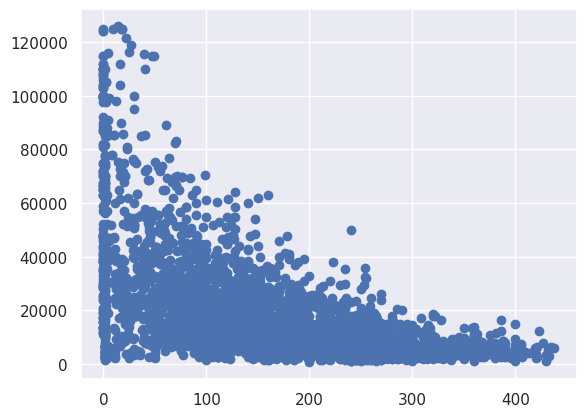

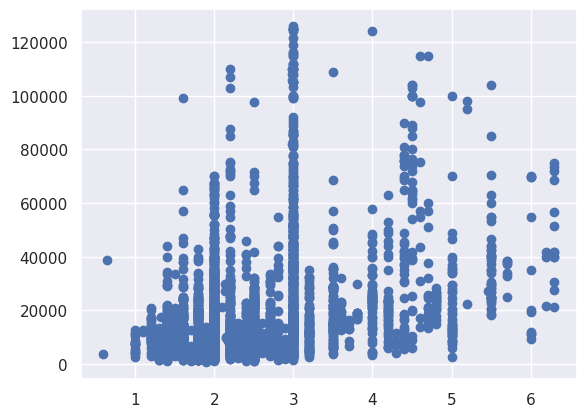

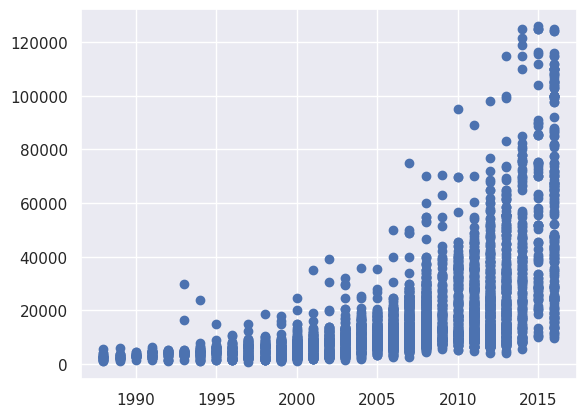

In [109]:
plt.scatter(df4['Mileage'],df4['Price'])
plt.show()
plt.scatter(df4['EngineV'],df4['Price'])
plt.show()
plt.scatter(df4['Year'],df4['Price'])
plt.show()

<ipython-input-110-7a04b31ec034>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Price'])


<Axes: xlabel='Price', ylabel='Density'>

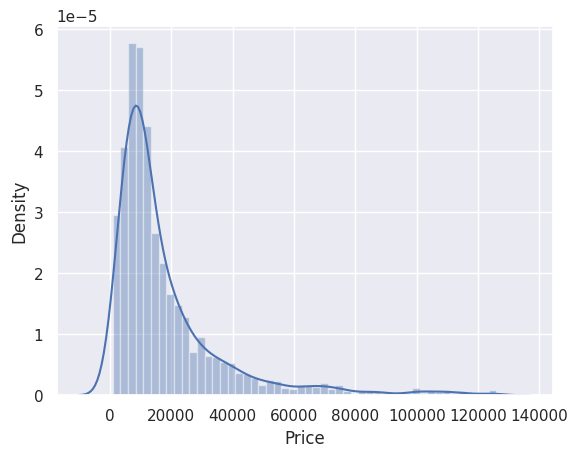

In [110]:
sns.distplot(df4['Price'])

<ipython-input-111-dbc4c9881da7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Log Price']=log_price
<ipython-input-111-dbc4c9881da7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_price)


<Axes: xlabel='Price', ylabel='Density'>

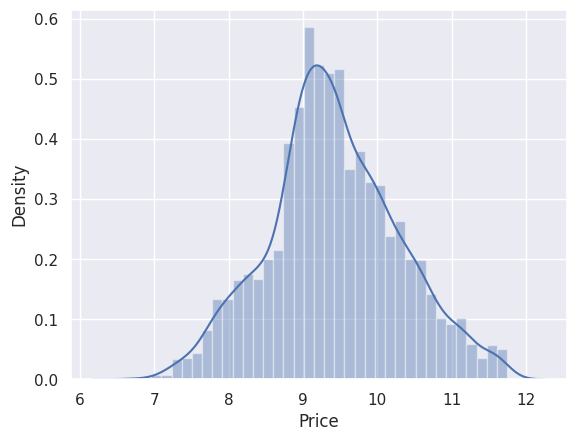

In [111]:
log_price=np.log(df4['Price'])
df4['Log Price']=log_price
sns.distplot(log_price)

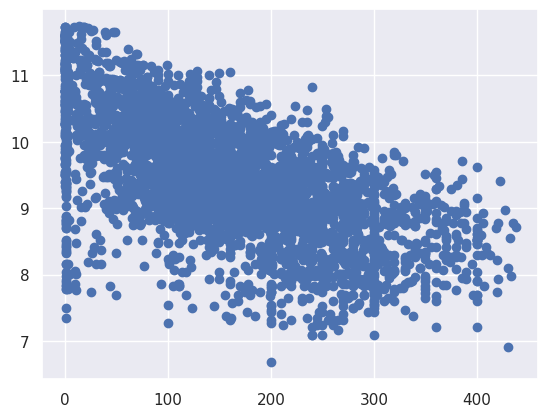

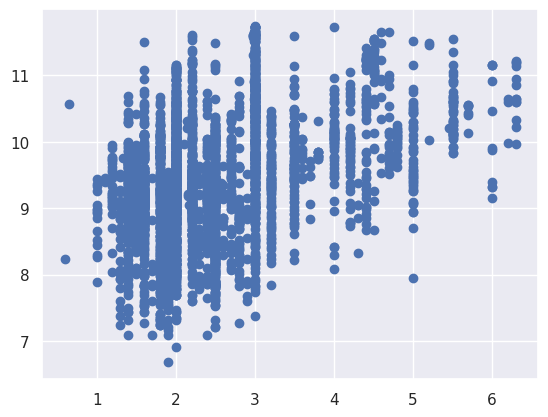

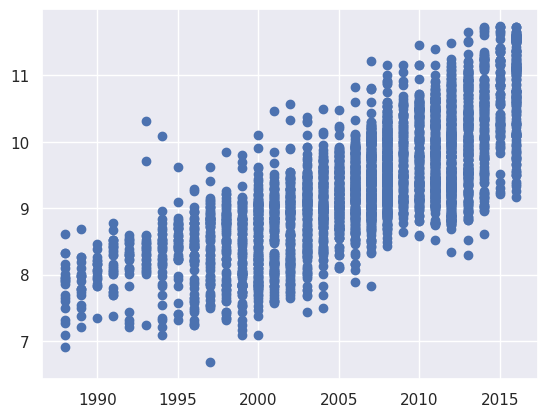

In [112]:
plt.scatter(df4['Mileage'],df4['Log Price'])
plt.show()
plt.scatter(df4['EngineV'],df4['Log Price'])
plt.show()
plt.scatter(df4['Year'],df4['Log Price'])
plt.show()

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=df4[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns

In [114]:
vif

,VIF,Features
0,3.791488,Mileage
1,10.355619,Year
2,7.669947,EngineV


In [115]:
df5=df4.drop(['Year'],axis=1)

Dummy Variables

In [116]:
df6=pd.get_dummies(df5,drop_first=True)

In [117]:
df6.head()

,Price,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,7900.0,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,13300.0,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,23000.0,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,18300.0,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [118]:
df6.columns

Index(['Price', 'Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

In [119]:
cols=['Log Price', 'Mileage', 'EngineV', 'Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [120]:
df7=df6[cols]

In [121]:
df7.drop('Price',axis=1)

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
4339,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
4340,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
4341,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


Standardize the data

In [122]:
target=df7['Log Price']
inputs=df7.drop('Log Price',axis=1)

In [130]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
scaler

StandardScaler()

In [124]:
scaledinputs=scaler.transform(inputs)

Train - Test Split

AttributeError: 'StandardScaler' object has no attribute 'values'

In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaledinputs,target,test_size=0.2,random_state=365)

Create Regression Model

In [133]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [134]:
y_hat=model.predict(x_train)

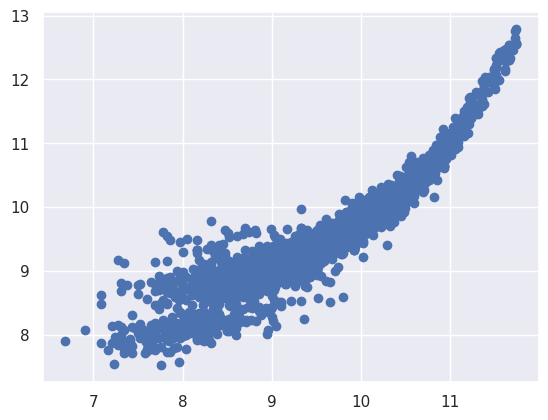

In [135]:
plt.scatter(y_train,y_hat)
plt.show()


<ipython-input-136-48621f63737a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


<Axes: xlabel='Log Price', ylabel='Density'>

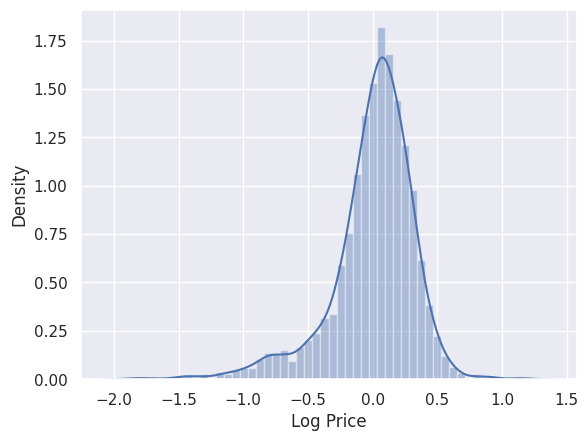

In [136]:
sns.distplot(y_train - y_hat)

In [138]:
model.score(x_train,y_train)

0.8613013637796461

In [139]:
model.coef_

array([-0.21873487,  0.10329701,  0.4630928 ,  0.00162208, -0.01519291,
       -0.06596475, -0.09870609, -0.01451709, -0.03946234, -0.07970911,
       -0.03240061, -0.09353619, -0.05828909, -0.06387098, -0.04720326,
       -0.01240117, -0.05672954,  0.24528078])

In [140]:
model_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
model_summary['Weights']=model.coef_
model_summary

,Features,Weights
0,Mileage,-0.218735
1,EngineV,0.103297
2,Price,0.463093
3,Brand_BMW,0.001622
4,Brand_Mercedes-Benz,-0.015193
5,Brand_Mitsubishi,-0.065965
6,Brand_Renault,-0.098706
7,Brand_Toyota,-0.014517
8,Brand_Volkswagen,-0.039462
9,Body_hatch,-0.079709


Testing

In [141]:
y_hattest=model.predict(x_test)

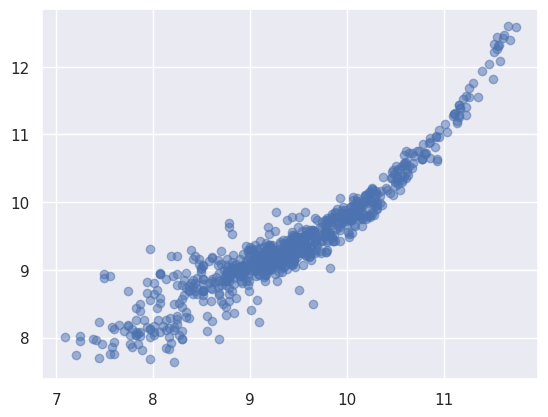

In [143]:
plt.scatter(y_test,y_hattest,alpha=0.5)
plt.show()

In [147]:
df_performance=pd.DataFrame(np.exp(y_hattest),columns=['Prediction'])
df_performance['Target']=np.exp(y_test.reset_index(drop=True))
df_performance

,Prediction,Target
0,9455.905016,7300.0
1,3512.011243,2800.0
2,7754.566721,7500.0
3,7630.802253,6400.0
4,6867.231502,7800.0
...,...,...
769,5679.768392,2999.0
770,9887.863298,9600.0
771,13692.796357,18300.0
772,62448.706081,62000.0


In [148]:
df_performance['Residual']=df_performance['Target']-df_performance['Prediction']

In [149]:
df_performance

,Prediction,Target,Residual
0,9455.905016,7300.0,-2155.905016
1,3512.011243,2800.0,-712.011243
2,7754.566721,7500.0,-254.566721
3,7630.802253,6400.0,-1230.802253
4,6867.231502,7800.0,932.768498
...,...,...,...
769,5679.768392,2999.0,-2680.768392
770,9887.863298,9600.0,-287.863298
771,13692.796357,18300.0,4607.203643
772,62448.706081,62000.0,-448.706081


In [153]:
df_performance["% Error"]=np.absolute(100*(df_performance['Residual']/df_performance['Target']))

In [154]:
df_performance

,Prediction,Target,Residual,% Error
0,9455.905016,7300.0,-2155.905016,29.532945
1,3512.011243,2800.0,-712.011243,25.428973
2,7754.566721,7500.0,-254.566721,3.394223
3,7630.802253,6400.0,-1230.802253,19.231285
4,6867.231502,7800.0,932.768498,11.958570
...,...,...,...,...
769,5679.768392,2999.0,-2680.768392,89.388743
770,9887.863298,9600.0,-287.863298,2.998576
771,13692.796357,18300.0,4607.203643,25.175976
772,62448.706081,62000.0,-448.706081,0.723719


In [155]:
df_performance.describe()

,Prediction,Target,Residual,% Error
count,774.000000,774.000000,774.000000,774.000000
mean,19376.174798,17770.771214,-1605.403584,26.584375
std,33194.511204,19125.480295,17588.287936,34.082070
min,2080.471829,1200.000000,-181099.143752,0.046596
25%,7842.863147,6900.000000,-1155.612452,8.465660
50%,10575.362570,11500.000000,412.625675,17.713529
75%,17307.160736,20974.250000,2880.060683,30.180742
max,296899.143752,126000.000000,14852.965019,323.059269
